# 아이리스 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../static/data/iris_train.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.3,1.7,0.5,0
1,6.1,3.0,4.9,1.8,2
2,5.1,3.4,1.5,0.2,0
3,5.1,3.5,1.4,0.3,0
4,5.2,3.4,1.4,0.2,0


In [3]:
df = df.rename({'sepal length (cm)':'sl', 'sepal width (cm)':'sw', 'petal length (cm)':'pl', 'petal width (cm)':'pw', 'target':'species'}, axis='columns')
df.head()

,sl,sw,pl,pw,species
0,5.1,3.3,1.7,0.5,0
1,6.1,3.0,4.9,1.8,2
2,5.1,3.4,1.5,0.2,0
3,5.1,3.5,1.4,0.3,0
4,5.2,3.4,1.4,0.2,0


PL을 구하는 선형회귀

In [4]:
feature_name = 'pl'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2021
)

NameError: name 'X' is not defined

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE: {mse:.2f}, RMSE: {np.sqrt(mse):.2f}')
print(f'R_squared: {r2:.4f}')

MSE: 0.04, RMSE: 0.19
R_squared: 0.9226


In [27]:
coef = lr.coef_
coef

array([-0.12876754,  0.17861614,  0.32741898,  0.37562097])

In [24]:
lr.intercept_

-0.1944501604164237

In [28]:
# 회귀식
coef[0]*Sepla length + coef[1]*Sepal width + coef[2]*Petal length + coef[3]*target + lr.intercept_

-0.1287675446051109

### 당뇨병 회귀

In [24]:
df = pd.read_csv('../static/data/diabetes_train.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.063635,-0.044642,-0.033151,-0.033214,0.001183,0.024051,-0.024993,-0.002592,-0.022512,-0.059067,214.0
1,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349,98.0
2,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207,127.0
3,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040672,-0.009362,233.0
4,-0.074533,-0.044642,-0.010517,-0.005671,-0.066239,-0.057054,-0.002903,-0.039493,-0.042572,-0.001078,168.0


In [25]:
feature = 'bp'

In [27]:
X = df[feature].values.reshape(-1,1)
y = df.target.values
X.shape, y.shape

((331, 1), (331,))

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X, y)

LinearRegression()

In [30]:
weight, bias = lr.coef_, lr.intercept_
print(weight)
print(bias)

[686.11222571]
148.91869337400198


In [32]:
df_t = pd.read_csv('../static/data/diabetes_test.csv')
df_t.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.034443,-0.044642,-0.007284,0.014987,-0.044223,-0.037326,-0.002903,-0.039493,-0.021394,0.007207,155.0
1,-0.009147,-0.044642,0.037984,-0.040099,-0.024960,-0.003819,-0.043401,0.015858,-0.005145,0.027917,167.0
2,0.005383,0.050680,-0.001895,0.008101,-0.004321,-0.015719,-0.002903,-0.002592,0.038393,-0.013504,185.0
3,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132373,0.003064,109.0
4,0.016281,-0.044642,-0.063330,-0.057314,-0.057983,-0.048912,0.008142,-0.039493,-0.059473,-0.067351,65.0


In [33]:
df_t.shape

(111, 11)

In [34]:
index = 100

In [41]:
X_test = df_t[feature][index]
y_test = df_t.target[index]
X_test, y_test

(-0.0366564467985606, 199.0)

In [42]:
pred = X_test * weight[0] + bias
pred

123.76825707441527

### 시각화

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
np.min(X), np.max(X)

(-0.10207098997955, 0.125158475807044)

In [44]:
y_min = np.min(X) * weight[0] + bias
y_max = np.max(X) * weight[0] + bias

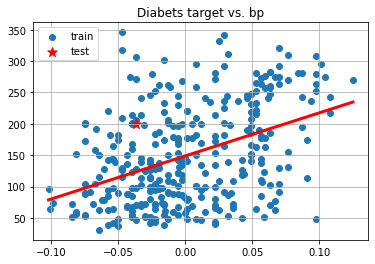

In [45]:
plt.scatter(X, y, label='train')
plt.plot([np.min(X), np.max(X)], [y_min, y_max], 'r', lw=3)
plt.scatter([X_test], [y_test], c='r', marker='*', s=100, label='test')
plt.grid()
plt.legend()
plt.title(f'Diabets target vs. {feature}')
plt.show()

### 보스톤 회귀

In [9]:
df = pd.read_csv('../static/data/boston_train.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
1,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36,23.1
2,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24,13.3
3,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
4,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,23.3


In [10]:
feature = 'CRIM'

In [11]:
X = df[feature].values.reshape(-1,1)
y = df.target.values
X.shape, y.shape

((379, 1), (379,))

In [12]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [13]:
df_t = pd.read_csv('../static/data/boston_test.csv')
df_t.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7
1,0.75026,0.0,8.14,0.0,0.538,5.924,94.1,4.3996,4.0,307.0,21.0,394.33,16.30,15.6
2,0.09744,0.0,5.96,0.0,0.499,5.841,61.4,3.3779,5.0,279.0,19.2,377.56,11.41,20.0
3,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
4,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0


In [14]:
weight, bias = lr.coef_, lr.intercept_
print(weight)
print(bias)

[-0.39029231]
24.130421513825855


In [15]:
df_t.shape

(127, 14)

In [16]:
index = 100

In [17]:
X_test = df_t[feature][index]
y_test = df_t.target[index]
X_test, y_test

(5.73116, 25.0)

In [18]:
tmp =lr.predict(X_test.reshape(1,-1))
np.round(tmp[0])

22.0